# Loading The Dataset
## The Dataset Contains Train and Test Folders Four Folders(Sarthak,Seema, Robert Downey Jr, Hugh Jackman) containing 663 images

In [39]:
import os
from PIL import Image
import numpy as np
import pandas as pd

folder_path = '../input/face-dataset-sarthak/Dataset/Train'
image_height = 62  # Set a fixed height for the images
image_width = 47   # Set a fixed width for the images

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('L')  # Convert image to grayscale
        img = img.resize((image_width, image_height))  # Resize image
        img_array = np.array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

def load_dataset(folder_path):
    images = []
    labels = []
    target_names = []
    label = 0
    for person_name in os.listdir(folder_path):
        person_folder = os.path.join(folder_path, person_name)
        if os.path.isdir(person_folder):
            target_names.append(person_name)
            person_images, person_labels = load_images_from_folder(person_folder, label)
            images.extend(person_images)
            labels.extend(person_labels)
            label += 1
    return np.array(images), np.array(labels), target_names

images, labels, target_names = load_dataset(folder_path)

# Verify the shapes
image_count = images.shape[0]
print(f'Number of images: {image_count}')
print(f'Image shape: {images.shape[1:]}')
print(f'Number of classes: {len(target_names)}')

# Convert the data to the format similar to fetch_lfw_people output
images = images.reshape((image_count, image_height, image_width))
faces_data = {
    'images': images,
    'target': labels,
    'target_names': target_names
}


Number of images: 563
Image shape: (62, 47)
Number of classes: 4


In [35]:
print(faces_data['target'])
print(faces_data['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

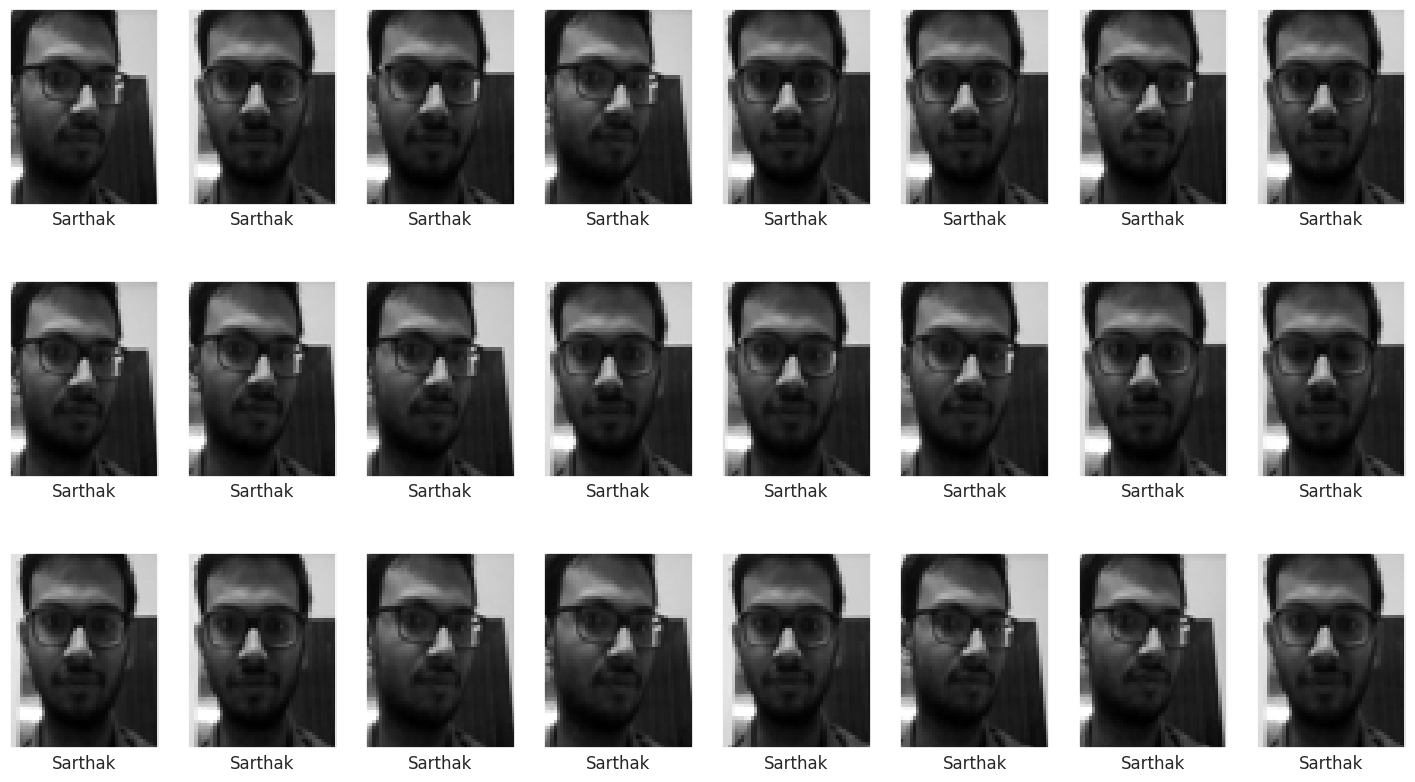

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Assuming faces_data dictionary has been created as shown in the previous response

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces_data['images'][i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces_data['target_names'][faces_data['target'][i]])

plt.show()


### Checking Whether data is balanced or not. We will plot a graph for the same and see how many images of each class is present.

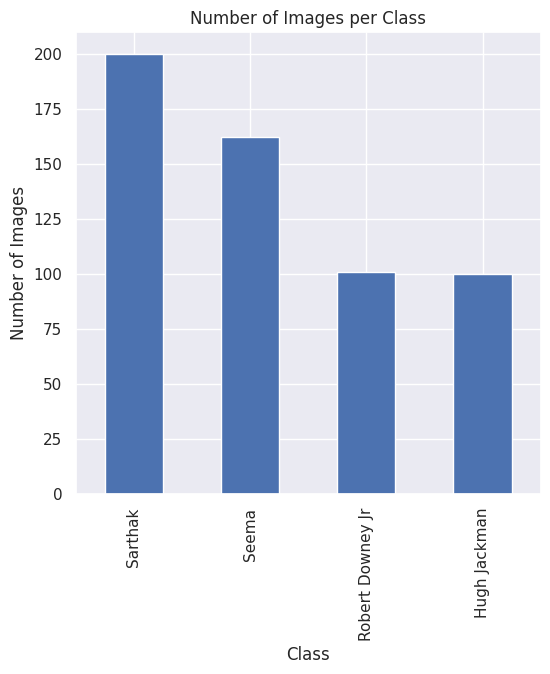

In [9]:
from collections import Counter
import pandas as pd

# Count the number of images per class
counts = Counter(faces_data['target'])
names = {faces_data['target_names'][key]: counts[key] for key in counts.keys()}

# Create a DataFrame from the counts
df = pd.DataFrame.from_dict(names, orient='index', columns=['Count'])

# Plot the DataFrame as a bar chart
df.plot(kind='bar', legend=False, figsize=(6, 6), title='Number of Images per Class')
plt.ylabel('Number of Images')
plt.xlabel('Class')
plt.show()


### As the data is unbalanced we will keep 100 images of each type and try to balance the dataset.

x_faces shape: (400, 62, 47)
y_faces shape: (400,)


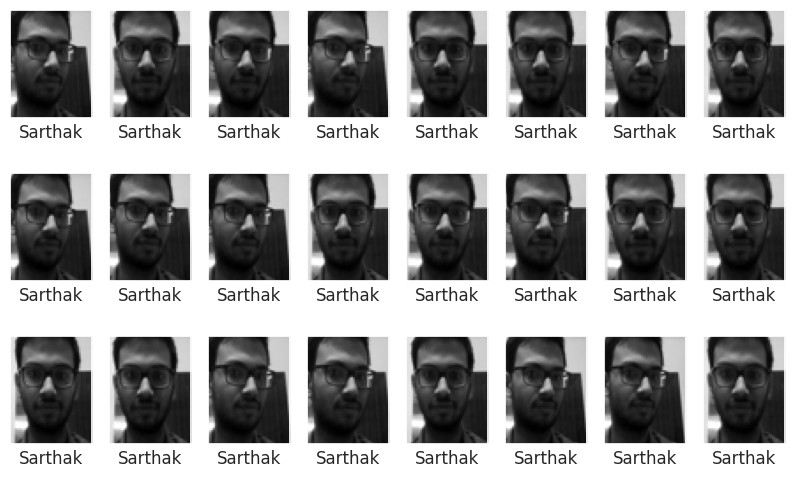

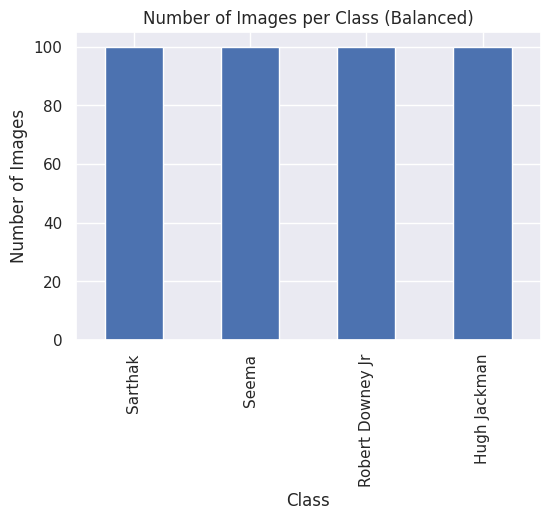

In [43]:
import numpy as np

# Ensure faces_data is correctly structured with images, target, and target_names
images = faces_data['images']
targets = faces_data['target']
target_names = faces_data['target_names']

# Create a mask to select up to 100 images for each class
mask = np.zeros(targets.shape, dtype=np.bool_)

for target in np.unique(targets):
    mask[np.where(targets == target)[0][:100]] = 1

# Apply the mask to select the images and labels
x_faces = images[mask]
y_faces = targets[mask]

# Verify the shapes
print(f'x_faces shape: {x_faces.shape}')
print(f'y_faces shape: {y_faces.shape}')

# Update faces_data with the balanced dataset
faces_data_balanced = {
    'images': x_faces,
    'target': y_faces,
    'target_names': target_names
}

# Re-visualize the balanced dataset
fig, ax = plt.subplots(3, 8, figsize=(10,6))
for i, axi in enumerate(ax.flat):
    if i < x_faces.shape[0]:
        axi.imshow(faces_data_balanced['images'][i], cmap='gist_gray')
        axi.set(xticks=[], yticks=[], xlabel=faces_data_balanced['target_names'][faces_data_balanced['target'][i]])
    else:
        axi.axis('off')

plt.show()

# Count the number of images per class in the balanced dataset
counts_balanced = Counter(faces_data_balanced['target'])
names_balanced = {faces_data_balanced['target_names'][key]: counts_balanced[key] for key in counts_balanced.keys()}

# Create a DataFrame from the counts
df_balanced = pd.DataFrame.from_dict(names_balanced, orient='index', columns=['Count'])

# Plot the DataFrame as a bar chart
df_balanced.plot(kind='bar', legend=False, figsize=(6, 4), title='Number of Images per Class (Balanced)')
plt.ylabel('Number of Images')
plt.xlabel('Class')
plt.show()


### Splitting The Data into Train and Test and normalizing images by dividing by 255

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the images
face_images = x_faces / 255.0

# One-hot encode the labels
face_labels = to_categorical(y_faces)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, train_size=0.8, stratify=y_faces, random_state=0)

# Verify the shapes of the resulting datasets
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


2024-06-20 04:52:15.607897: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 04:52:15.608002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 04:52:15.734136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


x_train shape: (320, 62, 47)
y_train shape: (320, 4)
x_test shape: (80, 62, 47)
y_test shape: (80, 4)


## Build And Train Neural Network
### We will build and train a neural network containing one hidden layer with 512 neurons. We'll use categorical_crossentropy as the loss function and a softmax output layer since this is a multiclass classification task. We will also use adam as the optimization algorithm. Rather than use a fixed learning rate, adam varies the learning rate as training proceeds so the network learns faster in the early stages of training and (hopefully) converges more accurately toward a solution in later stages.

In [26]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

# Reshape the images to flatten them
x_train_flat = x_train.reshape((x_train.shape[0], image_width * image_height))
x_test_flat = x_test.reshape((x_test.shape[0], image_width * image_height))

# Create the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(len(target_names), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Example to fit the model
# model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     1,492,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,532 (5.70 MB)

 Trainable params: 1,494,532 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow.keras.backend as K

# Clear TensorFlow session
K.clear_session()


In [27]:
hit = model.fit(x_train_flat, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3000 - loss: 1.3803

W0000 00:00:1718860431.383127     155 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5264 - loss: 2.4684 - val_accuracy: 0.4219 - val_loss: 3.1197
Epoch 2/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5500 - loss: 2.6330

W0000 00:00:1718860432.143437     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6607 - loss: 1.3338 - val_accuracy: 0.8594 - val_loss: 0.3093
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.5169 - val_accuracy: 0.8750 - val_loss: 0.3175
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8857 - loss: 0.2886 - val_accuracy: 0.8125 - val_loss: 0.3506
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.3491 - val_accuracy: 0.8125 - val_loss: 0.4570
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8878 - loss: 0.2708 - val_accuracy: 0.9375 - val_loss: 0.2333
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8802 - loss: 0.2016 - val_accuracy: 0.9219 - val_loss: 0.2444
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.1814 - val_accuracy: 0.8906 - val_loss: 0.2564
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9196 - loss: 0.1750 - val_accuracy: 0.9219 - val_loss: 0.2

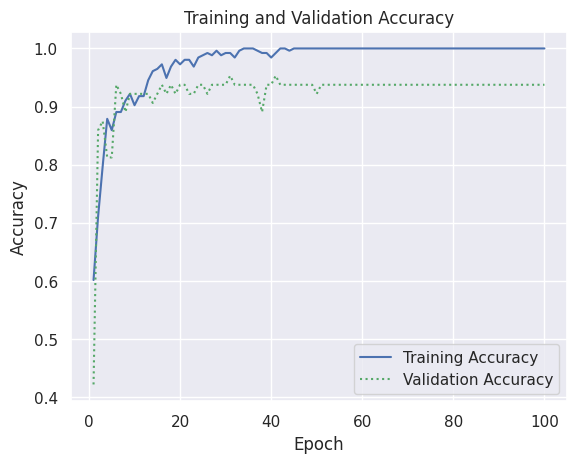

In [29]:
def show_history(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'g:', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Assuming hist is the history object returned by model.fit()
show_history(hit)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(109.44999999999996, 0.5, 'Actual label')

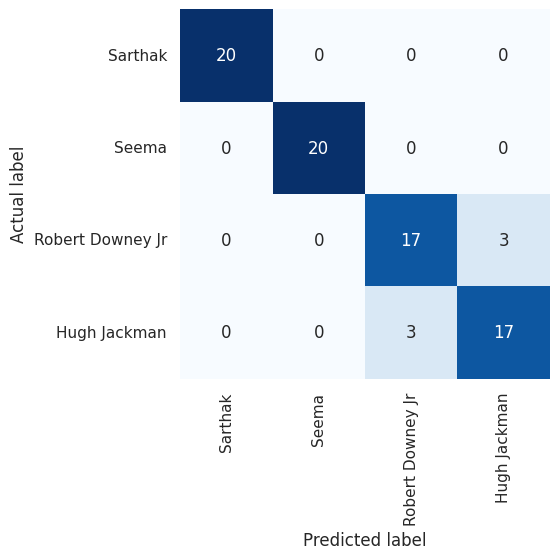

In [32]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test_flat)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces_data_balanced['target_names'],
            yticklabels=faces_data_balanced['target_names'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [34]:
model.save('model_new.h5')

In [38]:
# Evaluate on training set
train_loss, train_accuracy = model.evaluate(x_train_flat, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9875
Test Accuracy: 0.9250


### We got Test Accuracy of 92.5% using Deep Learning which is quite good.